# Importamos todas las librerias necesarias para el proyecto y el database


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Modelos a comparar
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,log_loss




#Cargamos el archivo .csv que es el database del proyecto y visualizamos algunas caracteristicas de él

In [32]:
df=pd.read_csv('https://raw.githubusercontent.com/isaavedrab85/PROYECTO/refs/heads/main/PROYECTO/01database.csv',sep=';')
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RUT          613 non-null    int64  
 1   SEXO         613 non-null    object 
 2   TIPO COL     613 non-null    int64  
 3   COMUNA       613 non-null    object 
 4   P_POND       613 non-null    float64
 5   P_PROM       613 non-null    float64
 6   P_NEM        613 non-null    int64  
 7   RK_COL       613 non-null    int64  
 8   P_LEN        613 non-null    int64  
 9   P_M1         613 non-null    int64  
 10  POND_SIN_M2  613 non-null    float64
 11  P_M2         613 non-null    int64  
 12  P_HIST       613 non-null    int64  
 13  P_CIENC      613 non-null    int64  
 14  MAX_C_H      613 non-null    int64  
 15  DIAG_MAT     613 non-null    float64
 16  AYG_24-1     613 non-null    float64
 17  C1_24-1      613 non-null    float64
 18  AL_24-2      613 non-null    float64
 19  C2_24-2 

,RUT,TIPO COL,P_POND,P_PROM,P_NEM,RK_COL,P_LEN,P_M1,POND_SIN_M2,P_M2,...,C2_24-2,AYG_24-2,C1_24-2,AP_AYG,AP_CI,AP_AL,AP_C2,AP_AYG_2,AP_CI_2,Total
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,307.000000,2.091354,705.314519,700.242251,749.657423,774.440457,674.528548,725.955954,683.165987,442.970636,...,3.853311,0.658418,0.514869,77487.765090,8189.233279,688.417618,67.047308,1.076672,0.079935,86433.619902
std,177.102136,0.572924,68.437849,83.492038,111.307632,128.097958,90.987580,104.960324,66.690282,80.165387,...,2.175082,1.538108,1.383147,41800.396342,3853.961746,463.518381,47.042527,3.102128,0.271414,44948.986282
min,1.000000,0.000000,503.000000,426.500000,356.000000,364.000000,375.000000,452.000000,481.600000,246.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,2.000000,654.300000,640.500000,680.000000,685.000000,600.000000,657.000000,635.550000,393.000000,...,2.600000,0.000000,0.000000,100000.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,101001.000000
50%,307.000000,2.000000,711.900000,695.500000,757.000000,782.000000,679.000000,717.000000,690.800000,437.000000,...,4.600000,0.000000,0.000000,100000.000000,10000.000000,1000.000000,100.000000,0.000000,0.000000,111100.000000
75%,460.000000,2.000000,751.550000,758.000000,837.000000,872.000000,738.000000,797.000000,729.700000,487.000000,...,5.325000,0.000000,0.000000,100000.000000,10000.000000,1000.000000,100.000000,0.000000,0.000000,111100.000000
max,613.000000,4.000000,919.050000,907.000000,1000.000000,1000.000000,935.000000,990.000000,885.950000,718.000000,...,7.000000,5.975000,6.080000,100000.000000,10000.000000,1000.000000,100.000000,10.000000,1.000000,111100.000000


#Codificamos las variables que son "objeto" o etiquetas.

In [33]:
# Codificar la variable SEXO, TIPO COLEGIO, COMUNA COLEGIO, AP_AYG, AP_CI, AP_AL, AP_C2, AP_AYG_2, AP_CI_2
le = LabelEncoder()
df['SEXO'] = le.fit_transform(df['SEXO'])
df['TIPO COL'] = le.fit_transform(df['TIPO COL'])
df['COMUNA'] = le.fit_transform(df['COMUNA'])
df['AP_AYG'] = le.fit_transform(df['AP_AYG'])
df['AP_CI'] = le.fit_transform(df['AP_CI'])
df['AP_AL'] = le.fit_transform(df['AP_AL'])
df['AP_C2'] = le.fit_transform(df['AP_C2'])
df['AP_AYG_2'] = le.fit_transform(df['AP_AYG_2'])
df['AP_CI_2'] = le.fit_transform(df['AP_CI_2'])
#df['Total'] = le.fit_transform(df['Total'])
#print(df.value_counts('Total'))

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RUT          613 non-null    int64  
 1   SEXO         613 non-null    int64  
 2   TIPO COL     613 non-null    int64  
 3   COMUNA       613 non-null    int64  
 4   P_POND       613 non-null    float64
 5   P_PROM       613 non-null    float64
 6   P_NEM        613 non-null    int64  
 7   RK_COL       613 non-null    int64  
 8   P_LEN        613 non-null    int64  
 9   P_M1         613 non-null    int64  
 10  POND_SIN_M2  613 non-null    float64
 11  P_M2         613 non-null    int64  
 12  P_HIST       613 non-null    int64  
 13  P_CIENC      613 non-null    int64  
 14  MAX_C_H      613 non-null    int64  
 15  DIAG_MAT     613 non-null    float64
 16  AYG_24-1     613 non-null    float64
 17  C1_24-1      613 non-null    float64
 18  AL_24-2      613 non-null    float64
 19  C2_24-2 

# Normalizamos los datos a escala común (promedio 0 y des. est. 1) y seleccionamos del dataset las variables explicativas: SEXO, TIPO COLEGIO, COMUNA COLEGIO, P. NEM, P. RANKING, P. PAES LENGUAJE, P. PAES M1, P. PAES M2, P. PAES CIENCIAS o HISTORIA y P. DIAGNOSTICO MATEMATICAS para  nuestra variable objetivo: APROBACIÓN CÁLCULO I

In [34]:
#Normalización de los Datos - StandardScaler

# Seleccionar características
features = df.columns[[1,2,3,6,7,8,9,11,14,15]]  # seleccionó las variables explicativas

# Normalizar características
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features) #creo un dataset con las variables explicativas

# Agregar la variable objetivo APROBACIÓN CÁLCULO I codificada
df_scaled['AP_CI_en'] = le.fit_transform(df['AP_CI'])

df_scaled.head()


,SEXO,TIPO COL,COMUNA,P_NEM,RK_COL,P_LEN,P_M1,P_M2,MAX_C_H,DIAG_MAT,AP_CI_en
0,0.516264,-1.906439,0.118485,0.191901,-0.026880,0.599158,1.821641,1.498494,0.500634,1.345261,1
1,0.516264,-0.159582,0.809740,0.317781,0.301262,-0.060811,-0.285636,-0.998385,0.488022,0.429348,1
2,0.516264,-0.159582,-0.918398,0.263832,0.473146,-0.742779,-0.543086,-1.672543,-1.265124,-1.079215,1
3,-1.936992,1.587275,-2.202158,1.603558,1.762274,-0.203805,-0.199819,-0.436587,-0.470533,-0.217179,1
4,0.516264,-0.159582,0.414737,1.351797,1.113804,1.369122,1.821641,1.473526,1.307838,1.237507,1


#Contruimos las matriz de Correlación entre las variables


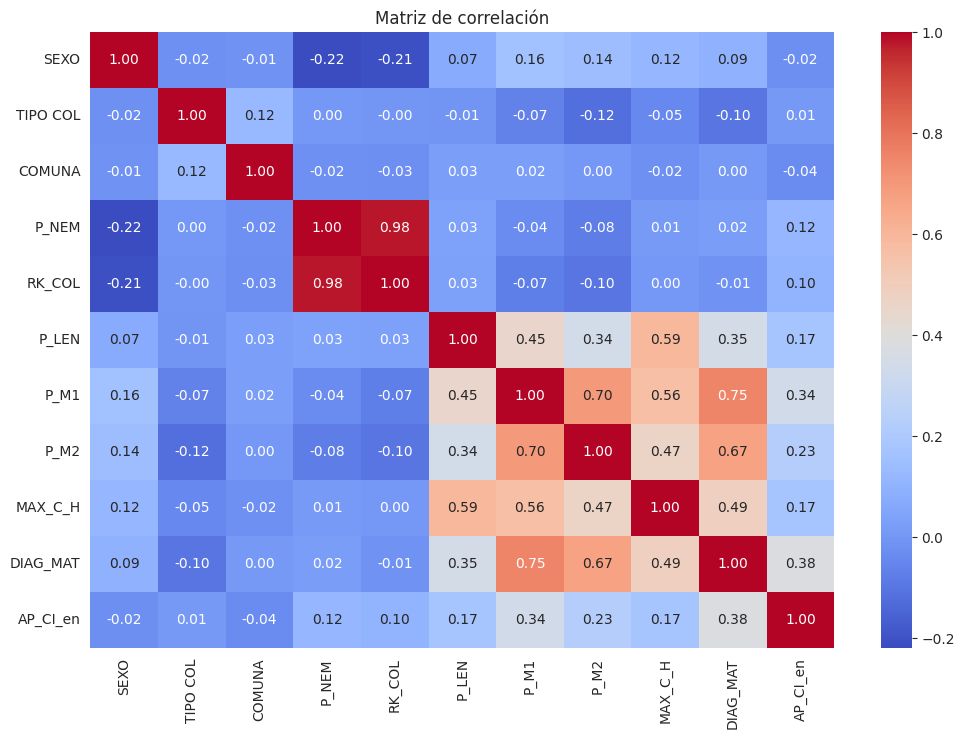

In [35]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
corr = df_scaled.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

#Separación del dataset en variables explicativas - variable objetivo y separación en datos de entrenamiento y testeo

In [36]:
X = df_scaled.drop(columns=["AP_CI_en"])
y = df_scaled["AP_CI_en"]

#  Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Entrenamientos de modelos

## Comenzamos con el entrenamiento con el Modelo de red neuronal de 3 capas ocultas y algunas métricas

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


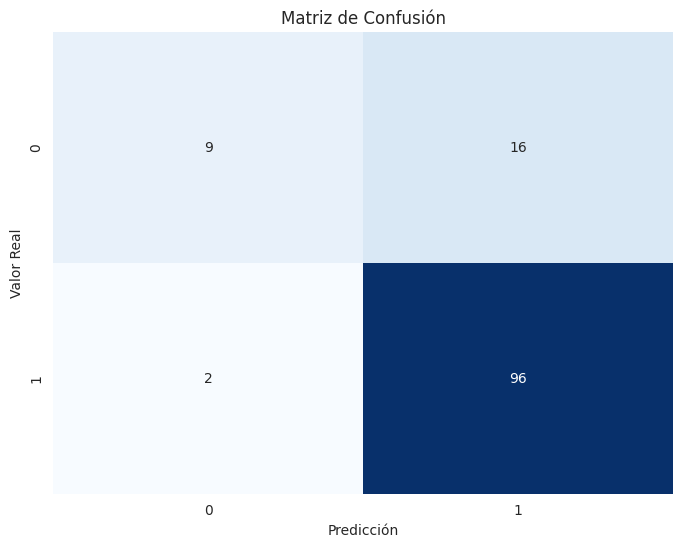

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Precisión: 0.8537
Accuracy: 0.8537
F1 score: 0.9143
Recall: 0.9796
ROC-AUC: 0.6698
Log Loss: 5.2747


In [39]:
#  Construir el modelo neuronal
model_neuronal = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta 1
    Dense(8, activation='relu'),                                   # Capa oculta 2
    Dense(4, activation='relu'),                                   # Capa oculta 3
    Dense(1, activation='sigmoid')                                 # Capa de salida (binaria)
])

# 5. Compilar el modelo
model_neuronal.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 6. Entrenar la red
history = model_neuronal.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=0
)



#matriz de confusión del modelo
y_pred = model_neuronal.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


# 7. Evaluar el modelo
test_loss, test_acc = model_neuronal.evaluate(X_test, y_test, verbose=0)
y_pred = model_neuronal.predict(X_test)
y_pred_neuronal_by = (y_pred > 0.5).astype(int)
print(f"\nPrecisión: {test_acc:.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_neuronal_by):.4f}")
print(f"F1 score: {f1_score(y_test, y_pred_neuronal_by):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_neuronal_by):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_neuronal_by):.4f}")
print(f"Log Loss: {log_loss(y_test, y_pred_neuronal_by):.4f}")

#print(f"accuracy_score: {accuracy_score(y_test, y_pred_neuronal_by):.4f}")

##Entrenamiento de los modelos: Regresión Logística - Random Forest - SVM - KNN - Naive Bayes - XGBoost y algunas métricas

<Figure size 1400x800 with 0 Axes>

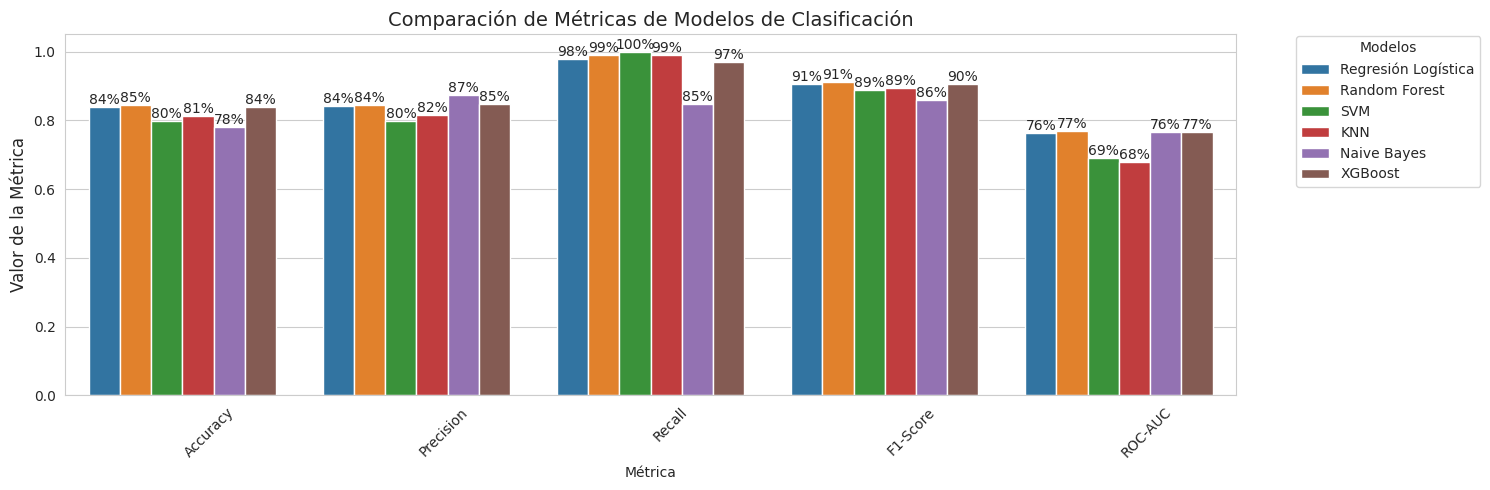

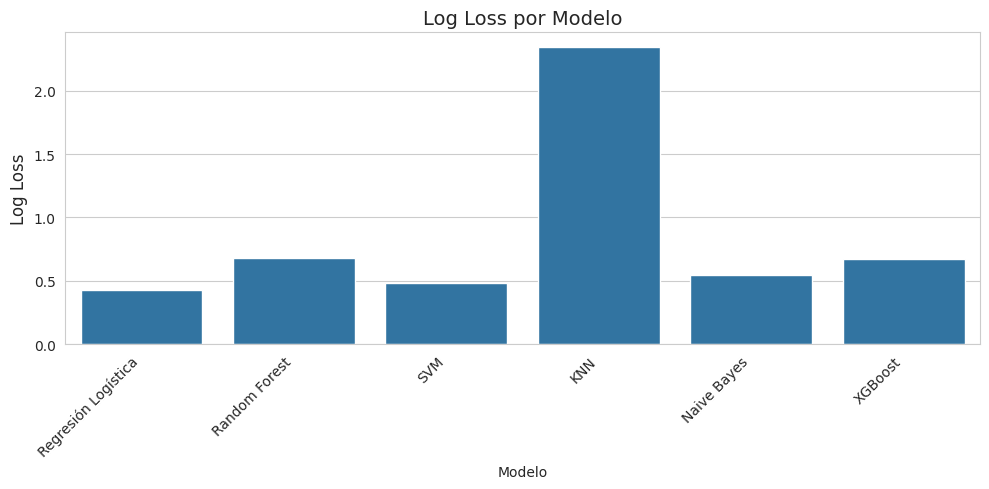

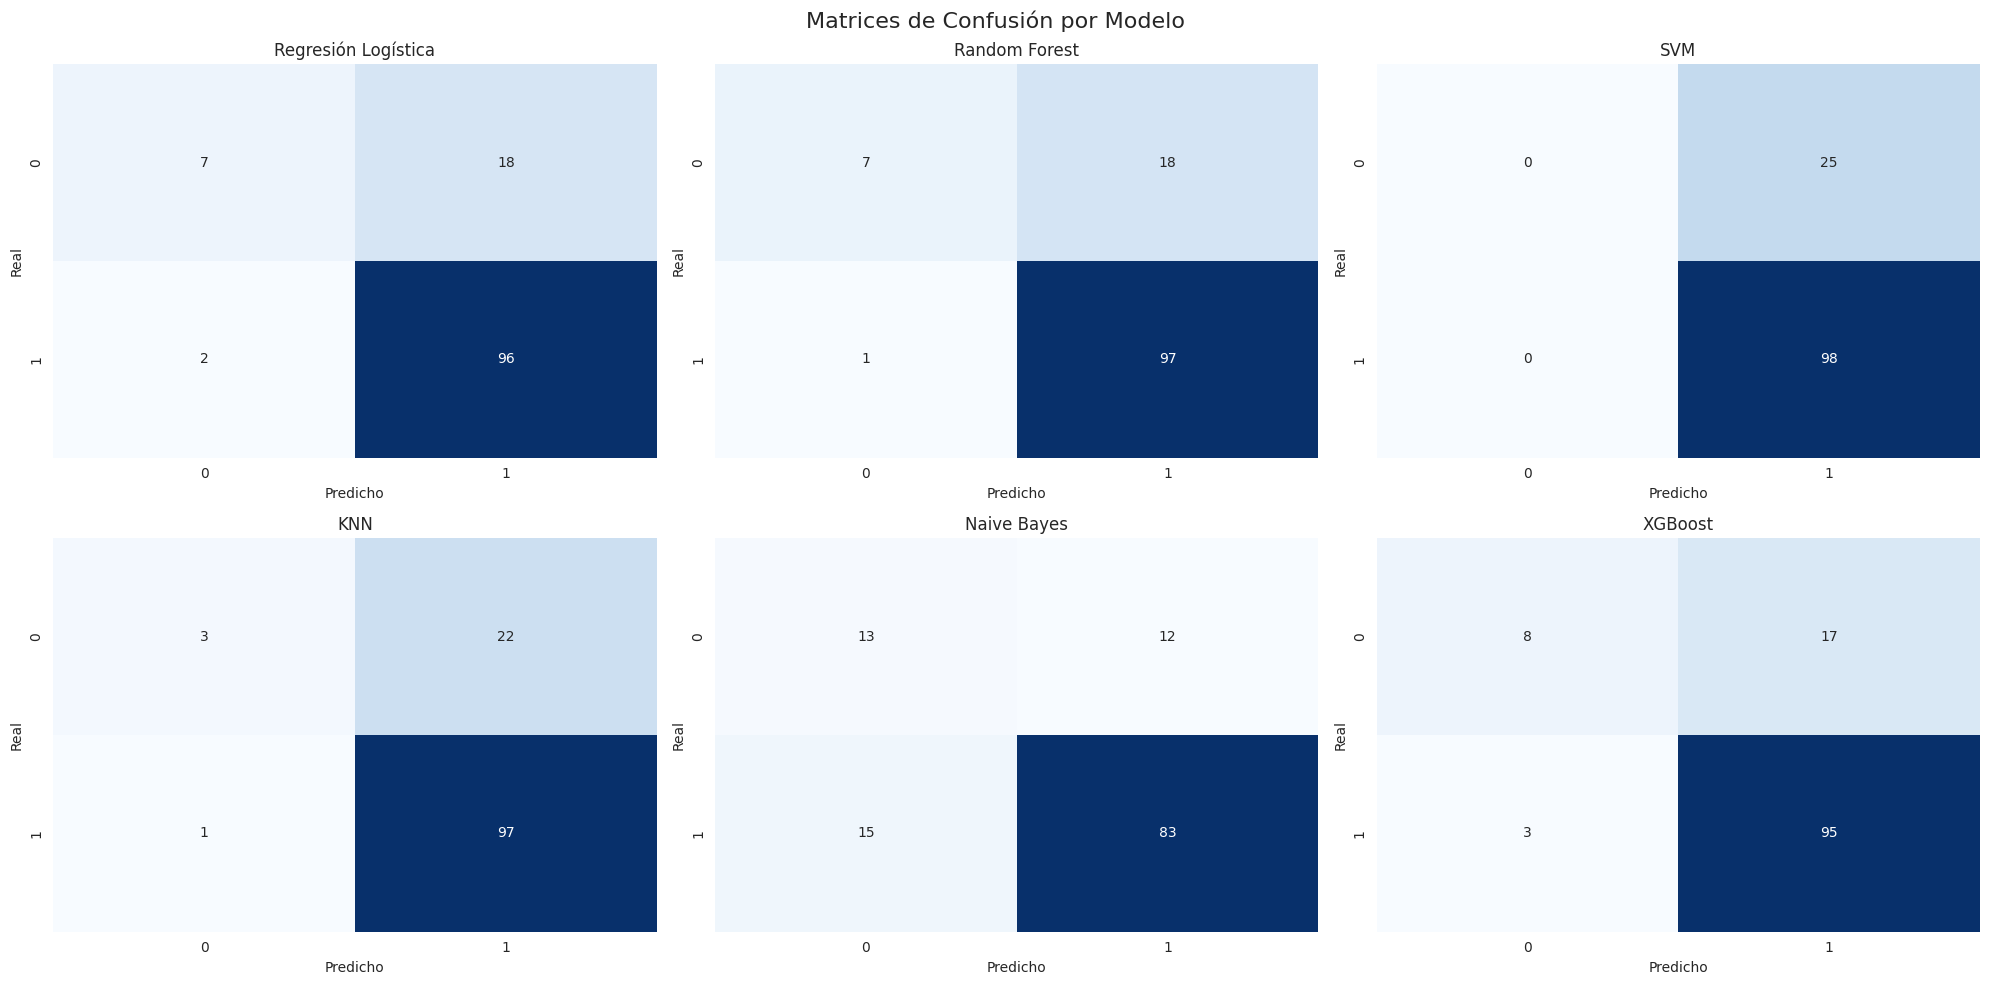

In [38]:
#Modelos
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC", "Log Loss"]
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    #"Red Neuronal": model_neuronal  # Agrega el modelo de
    # Note: The Neural Network model was trained and added to
    # this dictionary in the cell before this one.
    # Let's assume 'Red Neuronal' model is already in the 'models' dictionary
    # from the previous cell execution. If not, you might need to re-add it
    # or ensure that the execution flow adds it to the dictionary before this cell.
}

# 4. Entrenar y evaluar modelos
results = {}
conf_matrices = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    conf_matrices[name] = confusion_matrix(y_test, y_pred)



for name, model in models.items():
    y_pred = model.predict(X_test)
    # For models that do not support predict_proba (like SVC by default if probability=False),
    # this will cause an error. Ensure models support predict_proba or handle it.
    # In this case, SVC is initialized with probability=True, so it should work.
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # Store the metrics in a dictionary
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba),
        "Log Loss": log_loss(y_test, y_pred_proba)
    }


# Preparar datos para seaborn
plot_data = []
# Iterate through the results dictionary to build the plot_data list
for model_name, model_metrics in results.items():
    for metric, value in model_metrics.items():
        # Exclude Log Loss for the initial plot if the scale is too different
        if metric != "Log Loss":
             plot_data.append({"Modelo": model_name, "Métrica": metric, "Valor": value})


# DataFrame para seaborn
df_plot = pd.DataFrame(plot_data)

# Define a color palette
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
palette = None#sns.color_palette("colorblind", len(models))


# Gráfico de barras agrupadas
plt.figure(figsize=(15, 5)) # Adjust figure size as needed
ax = sns.barplot(x="Métrica", y="Valor", hue="Modelo", data=df_plot, palette=palette)
ax.set_title("Comparación de Métricas de Modelos de Clasificación", fontsize=14)
ax.set_ylabel("Valor de la Métrica", fontsize=12)
plt.xticks(rotation=45, ha='left')
plt.legend(
    bbox_to_anchor=(1.05, 1),  # Posición (x, y) relativa al eje
    loc='upper left',          # Punto de anclaje de la leyenda
    borderaxespad=0.1,         # Espacio entre leyenda y gráfico
    frameon=True,              # Borde visible
    title="Modelos"            # Título opcional
)
#valor = %.3f*100
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f"{x*100:.0f}%", label_type='edge')
plt.tight_layout()
plt.show()

# Optional: Plot Log Loss separately if its scale is different
log_loss_data = []
for model_name, model_metrics in results.items():
    log_loss_data.append({"Modelo": model_name, "Métrica": "Log Loss", "Valor": model_metrics["Log Loss"]})

df_log_loss = pd.DataFrame(log_loss_data)

plt.figure(figsize=(10, 5))
ax_log_loss = sns.barplot(x="Modelo", y="Valor", data=df_log_loss, palette=palette)
ax_log_loss.set_title("Log Loss por Modelo", fontsize=14)
ax_log_loss.set_ylabel("Log Loss", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




# 6. Matrices de confusión combinadas
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
#fig.delaxes(axes[1, 3])  # Eliminar el último subplot vacío
#fig.delaxes(axes[1,2])
for (name, matrix), ax in zip(conf_matrices.items(), axes.ravel()[:len(models)]):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(name)
    ax.set_xlabel("Predicho")
    ax.set_ylabel("Real")

plt.suptitle("Matrices de Confusión por Modelo", fontsize=16)
plt.tight_layout()
plt.show()

## Conclusión en el uso del modelo:

 En este punto decido usar el Modelo Logístico. Junto con el modelo Random Forest tienen las mejores métricas y muy parecidas. Sin embargo, en este punto, dada las caraterísticas (enfoque parámetrico) del modelo Logístico, es que me inclino por él. Esto me permite hacer algunas pruebas estadísticas como el p-value, lo cual me ayuda a reducir el número de variables explicativas y quedarme con las que tienen mayor significancia para mi variable objetivo.